# Restaurant Data EDA

In [4]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [5]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
DO_WRITE_CHARTS = True

# Load Review Data for Arizona Restaurants

In [22]:
time_marker(text='Loading Review Data...')
restaurants = pd.read_csv('../clean_data/az_restaurant_business_clean.csv', index_col=0)
time_marker(text='Complete!')

[13:59:16.510575] Loading Review Data...
[13:59:16.638331] Complete!


In [23]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8603 entries, 0 to 8602
Data columns (total 23 columns):
business_id        8603 non-null object
address            8527 non-null object
categories         8603 non-null object
city               8603 non-null object
is_open            8603 non-null int64
name               8603 non-null object
postal_code        8592 non-null float64
review_count       8603 non-null int64
stars              8603 non-null float64
monday_open        8603 non-null object
monday_close       8603 non-null object
tuesday_open       8603 non-null object
tuesday_close      8603 non-null object
wednesday_open     8603 non-null object
wednesday_close    8603 non-null object
thursday_open      8603 non-null object
thursday_close     8603 non-null object
friday_open        8603 non-null object
friday_close       8603 non-null object
saturday_open      8603 non-null object
saturday_close     8603 non-null object
sunday_open        8603 non-null object
sunday_close 

In [24]:
restaurants.head(3).transpose()

,0,1,2
business_id,rDMptJYWtnMhpQu_rRXHng,1WBkAuQg81kokZIPMpn9Zg,iPa__LOhse-hobC2Xmp-Kw
address,719 E Thunderbird Rd,"777 E Thunderbird Rd, Ste 107",1635 E Camelback Rd
categories,"['fast_food', 'burgers', 'restaurants']","['burgers', 'restaurants']","['restaurants', 'burgers', 'fast_food']"
city,Phoenix,Phoenix,Phoenix
is_open,1,1,1
name,McDonald's,Charr An American Burger Bar,McDonald's
postal_code,85022,85022,85016
review_count,10,232,34
stars,1,3,3
monday_open,00:00:00,11:00:00,05:00:00


# Exploratory Data Analysis

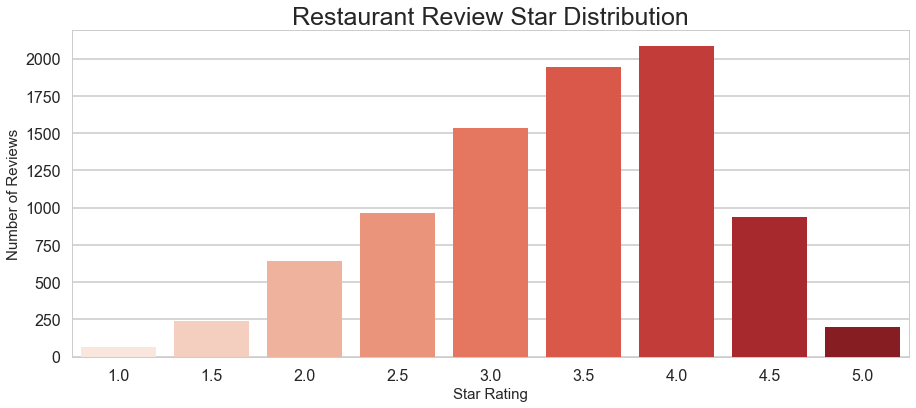

In [26]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.countplot(x="stars", data=restaurants, palette="Reds")

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

title = 'Arizona Restaurant Review Star Distribution'
ax.set_title(title, size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}_bar.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()

In [29]:
DO_WRITE_CHARTS = False

In [30]:
restaurants.head()

,business_id,address,categories,city,is_open,name,postal_code,review_count,stars,monday_open,...,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
0,rDMptJYWtnMhpQu_rRXHng,719 E Thunderbird Rd,"['fast_food', 'burgers', 'restaurants']",Phoenix,1,McDonald's,85022.0,10,1.0,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
1,1WBkAuQg81kokZIPMpn9Zg,"777 E Thunderbird Rd, Ste 107","['burgers', 'restaurants']",Phoenix,1,Charr An American Burger Bar,85022.0,232,3.0,11:00:00,...,11:00:00,22:00:00,11:00:00,22:00:00,11:00:00,23:00:00,11:00:00,23:00:00,11:00:00,21:00:00
2,iPa__LOhse-hobC2Xmp-Kw,1635 E Camelback Rd,"['restaurants', 'burgers', 'fast_food']",Phoenix,1,McDonald's,85016.0,34,3.0,05:00:00,...,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00
3,kKx8iCJkomVQBdWHnmmOiA,10720 E Southern Ave,"['restaurants', 'pizza']",Mesa,1,Little Caesars Pizza,85209.0,4,2.5,00:00:00,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,YhV93k9uiMdr3FlV4FHjwA,NaN,"['marketing', 'mens_clothing', 'restaurants', ...",Phoenix,1,Caviness Studio,85001.0,4,5.0,08:00:00,...,08:00:00,17:00:00,08:00:00,17:00:00,08:00:00,17:00:00,09:00:00,15:00:00,00:00:00,00:00:00


In [52]:
# len(restaurants.city.unique())
len(restaurants.review_count.unique())

561

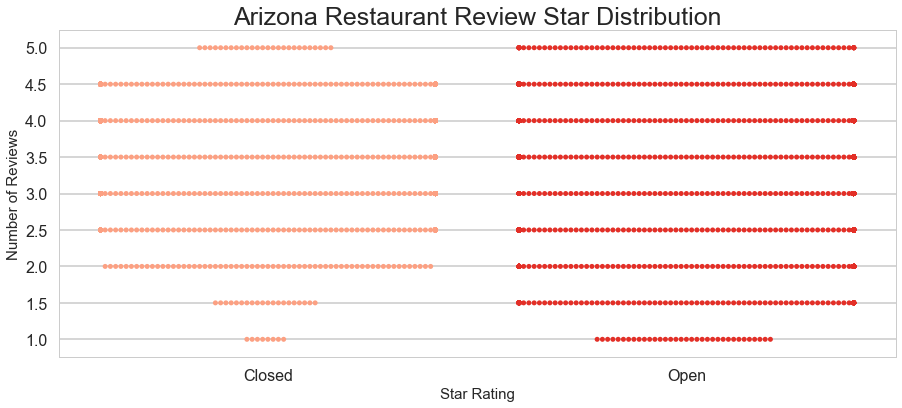

In [54]:
ax = plt.figure(figsize=FIG_SIZE)
# ax = plt.figure()
ax = sns.swarmplot(x="is_open", y='stars', data=restaurants[:5000], palette="Reds")

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

ax.set_xticklabels(['Closed', 'Open'])

title = 'Arizona Restaurant Review Star Distribution'
ax.set_title(title, size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}_swarm.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()